In [1]:
# Library
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_all_phones.csv')
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,2023-08-18,190.0,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,2023-08-23,190.0,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,470.000


In [44]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [4]:
df.isnull().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

In [5]:
# Cek apakah ada duplikasi
jumlah_duplikasi = df.duplicated()
jumlah_duplikasi

0       False
1       False
2       False
3       False
4       False
        ...  
1507    False
1508    False
1509    False
1510    False
1511    False
Length: 1512, dtype: bool

In [6]:
# Cek apakah ada duplikasi
jumlah_duplikasi = df[(df.duplicated())]
jumlah_duplikasi


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)


In [7]:

df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,2023-08-18,190.0,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,2023-08-23,190.0,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,470.000


In [8]:
# Change Date Format
df['announcement_date'] = pd.to_datetime(df['announcement_date'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   phone_name         1512 non-null   object        
 1   brand              1512 non-null   object        
 2   os                 1512 non-null   object        
 3   inches             1512 non-null   float64       
 4   resolution         1512 non-null   object        
 5   battery            1512 non-null   int64         
 6   battery_type       1512 non-null   object        
 7   ram(GB)            1512 non-null   int64         
 8   announcement_date  1512 non-null   datetime64[ns]
 9   weight(g)          1512 non-null   float64       
 10  storage(GB)        1512 non-null   int64         
 11  video_720p         1512 non-null   bool          
 12  video_1080p        1512 non-null   bool          
 13  video_4K           1512 non-null   bool          
 14  video_8K

In [10]:
# Drop the boolean columns
video_columns = [
    'video_720p', 'video_1080p', 'video_4K', 'video_8K',
    'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
    'video_480fps', 'video_960fps'
]

df = df.drop(columns=video_columns)

In [39]:
# Cek apakah sudah kedrop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   phone_name         1512 non-null   object        
 1   brand              1512 non-null   object        
 2   os                 1512 non-null   object        
 3   inches             1512 non-null   float64       
 4   resolution         1512 non-null   object        
 5   battery            1512 non-null   int64         
 6   battery_type       1512 non-null   object        
 7   ram(GB)            1512 non-null   int64         
 8   announcement_date  1512 non-null   datetime64[ns]
 9   weight(g)          1512 non-null   float64       
 10  storage(GB)        1512 non-null   int64         
 11  price(USD)         1512 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 141.9+ KB


In [11]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,16,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,16,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,16,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,32,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,32,420.0


In [57]:
# Add Release Year Column
df['Release Year'] = df['announcement_date'].dt.year
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),price(USD),Release Year
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,16,120.0,2016
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,16,100.0,2016
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,16,420.0,2017
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,32,150.0,2017
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,32,420.0,2017


In [38]:
# Sorting berdasarkan Smartphone dengan Harga Tertinggi
# Sort the DataFrame by 'price(USD)' in descending order
sorted_df = df[['phone_name', 'brand', 'ram(GB)','battery', 'price(USD)']].sort_values(by='price(USD)', ascending=False)

sorted_df.head(20)


,phone_name,brand,ram(GB),battery,price(USD)
777,P40 4G,Huawei,8,3800,2300.00
442,nova 6 5G,Huawei,8,4200,2150.00
487,Xperia Pro,Sony,12,4000,2000.00
1166,Mate Xs 2,Huawei,8,4880,1995.99
492,P40 lite,Huawei,8,4200,1950.00
1436,Pixel Fold,Google,12,4821,1750.00
379,Galaxy M10s,Samsung,3,4000,1750.00
421,nova 5z,Huawei,6,4000,1700.00
950,iPhone 13 Pro,Apple,6,3095,1580.09
1324,Magic Vs Ultimate,Honor,16,5000,1500.00


In [27]:
# Sort the DataFrame by 'price(USD)' in descending order, the Top 5
sorted_5_df = df[['phone_name', 'brand', 'ram(GB)','battery', 'price(USD)']].sort_values(by='price(USD)', ascending=False).head()
sorted_5_df

,phone_name,brand,ram(GB),battery,price(USD)
777,P40 4G,Huawei,8,3800,2300.00
442,nova 6 5G,Huawei,8,4200,2150.00
487,Xperia Pro,Sony,12,4000,2000.00
1166,Mate Xs 2,Huawei,8,4880,1995.99
492,P40 lite,Huawei,8,4200,1950.00


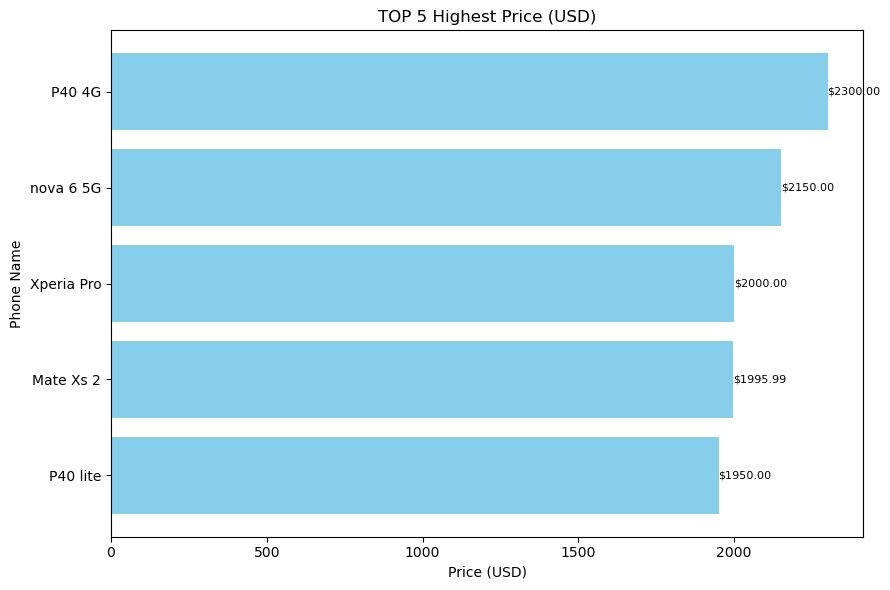

In [54]:
# Top 5 Highest Price
# Create a bar chart
plt.figure(figsize=(9, 6))
bars = plt.barh(sorted_5_df['phone_name'], sorted_5_df['price(USD)'], color='skyblue')
plt.xlabel('Price (USD)')
plt.ylabel('Phone Name')
plt.title('TOP 5 Highest Price (USD)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest price at the top
plt.tight_layout()

# Show the plot

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'${width:.2f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


In [55]:
# Top 5 Lowest Prices Smartphone 
sorted_5_low_df = df[['phone_name', 'brand', 'ram(GB)','battery','announcement_date', 'price(USD)']].sort_values(by='price(USD)', ascending=True).head()
sorted_5_low_df

,phone_name,brand,ram(GB),battery,announcement_date,price(USD)
452,C2s,Realme,3,4000,2020-01-01,40.00
608,Galaxy M01s,Samsung,3,4000,2020-07-16,60.00
220,V40 ThinQ,LG,6,3300,2018-10-03,70.00
99,K8 (2018),LG,2,2500,2018-02-01,70.00
1409,Redmi A2,Xiaomi,4,5000,2023-03-24,71.37


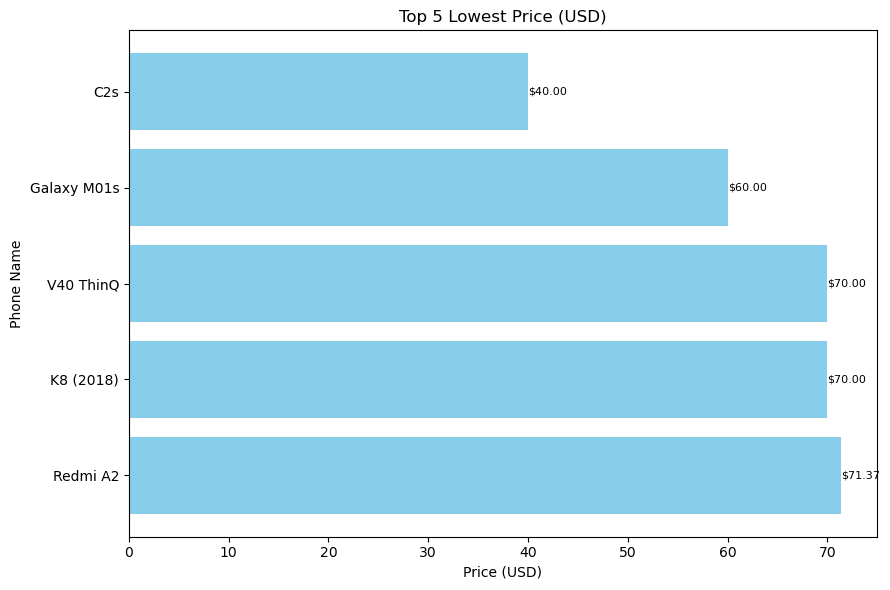

In [53]:
# Top 5 Lowest Price
# Create a bar chart
plt.figure(figsize=(9, 6))
bars = plt.barh(sorted_5_low_df['phone_name'], sorted_5_low_df['price(USD)'], color='skyblue')
plt.xlabel('Price (USD)')
plt.ylabel('Phone Name')
plt.title('Top 5 Lowest Price (USD)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest price at the top
plt.tight_layout()

# Show the plot

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'${width:.2f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# TOP 5 Highest Price Smartphone by Each Year



In [13]:
# Make Regression Model

price_model = df[['price(USD)','ram(GB)']]
price_model.head()

,price(USD),ram(GB)
0,120.0,2
1,100.0,2
2,420.0,4
3,150.0,4
4,420.0,4


In [49]:
# Regression Model
reg_model = sm.OLS(price_model['price(USD)'], sm.add_constant(price_model[['ram(GB)']]))
hasil = reg_model.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:             price(USD)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.89e-31
Time:                        15:26:04   Log-Likelihood:                -10523.
No. Observations:                1512   AIC:                         2.105e+04
Df Residuals:                    1510   BIC:                         2.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.0553     17.510      8.227      0.0

In [52]:
# Prediction (ingat rumus dasar => y=b0 + b1x1, ini diaplikasikan dibawah)
def model(x):
    y= 144.0553 + (28.9940*x)
    return y
print(model(16))


607.9593


In [16]:
# Make Regression Model

price_model = df[['price(USD)','ram(GB)','weight(g)']]
price_model.head()

,price(USD),ram(GB),weight(g)
0,120.0,2,140.0
1,100.0,2,140.0
2,420.0,4,147.0
3,150.0,4,165.0
4,420.0,4,145.0


In [46]:
# Regression Model
reg_model = sm.OLS(price_model['price(USD)'], sm.add_constant(price_model[['ram(GB)','weight(g)']]))
hasil = reg_model.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:             price(USD)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     82.65
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           8.69e-35
Time:                        15:23:28   Log-Likelihood:                -10513.
No. Observations:                1512   AIC:                         2.103e+04
Df Residuals:                    1509   BIC:                         2.105e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.5388     47.166     -1.199      0.2

In [51]:
# Prediction (ingat rumus dasar => y=b0 + b1x1, ini diaplikasikan dibawah)
def model(x1,x2):
    y= -56.5388 + (24.4911*x1) + (1.2295*x2)
    return y
print(model(16, 1.1976))


336.79124920000004


In [58]:


# Assuming you have a DataFrame df with the given columns
# Replace 'df' with your actual DataFrame name

# Sort the DataFrame primarily by 'price(USD)' in descending order
sorted_df = df.sort_values(by='price(USD)', ascending=False)

# Display the sorted DataFrame
print(sorted_df)


       phone_name    brand                os  inches resolution  battery  \
777        P40 4G   Huawei        Android 10    6.10  1080x2340     3800   
442     nova 6 5G   Huawei        Android 10    6.57  1080x2400     4200   
487    Xperia Pro     Sony        Android 10    6.50  1644x3840     4000   
1166    Mate Xs 2   Huawei           EMUI 12    7.80  2200x2480     4880   
492      P40 lite   Huawei        Android 10    6.40  1080x2310     4200   
...           ...      ...               ...     ...        ...      ...   
1409     Redmi A2   Xiaomi  Android 12 or 13    6.52   720x1600     5000   
99      K8 (2018)       LG     Android 7.1.2    5.00   720x1280     2500   
220     V40 ThinQ       LG       Android 8.1    6.40  1440x3120     3300   
608   Galaxy M01s  Samsung       Android 9.0    6.20   720x1520     4000   
452           C2s   Realme       Android 9.0    6.10   720x1560     4000   

     battery_type  ram(GB) announcement_date  weight(g)  storage(GB)  \
777         Li-